## Projeto Final de Aprendizagem de Máquina

### Objetivo
Este projeto tem como objetivo aplicar os conceitos de Aprendizagem de Máquina (AM) abordados durante a cadeira a problemas práticos enfrentados pela sociedade. Utilizaremos um dataset com aplicabilidade prática relevante para implementar diferentes modelos de AM e comparar seus desempenhos.

### Metodologia
Neste projeto, implementaremos os seguintes modelos de Aprendizagem de Máquina:
- Support Vector Machine (SVM)
- Redes Neurais
- Árvores de Decisão

Cada modelo será treinado utilizando o mesmo conjunto de dados e avaliado com métricas adequadas para comparação de desempenho.

### Estrutura do Projeto
Este notebook foca especificamente na implementação do modelo de Redes Neurais. A análise exploratória dos dados (EDA) e pré-processamento foram realizados em um notebook separado.

1. Carregamento dos dados pré-processados
2. Implementação do modelo de Redes Neurais
3. Treinamento do modelo
4. Avaliação do desempenho
5. Análise dos resultados

Os demais modelos (SVM e Árvores de Decisão) serão implementados em notebooks complementares para posterior comparação de resultados.


In [1]:
# Importando bibliotecas necessárias para redes neurais

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv("../data/Student_Depression_Cleaned.csv")

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Family History of Mental Illness,Depression,Weighted Stress,Quality of Life,Efficiency,Risk Group,Academic_Work_Interaction,Academic_Financial_Interaction,Work_Financial_Interaction,Study_CGPA_Interaction
0,2,2,5.0,8.97,2.0,2,3,2,1,3.0,...,0,1,3.4,2.3,2.2425,0,15.0,5.0,3.0,17.94
1,1,1,2.0,5.90,5.0,2,2,2,0,3.0,...,1,0,2.0,2.9,1.4750,0,6.0,4.0,6.0,29.50
2,2,2,3.0,7.03,5.0,1,3,2,0,9.0,...,1,0,2.2,2.8,0.7030,0,27.0,3.0,9.0,35.15
3,1,2,3.0,5.59,2.0,3,2,2,1,4.0,...,1,1,3.8,2.4,1.1180,1,12.0,15.0,20.0,11.18
4,1,2,4.0,8.13,3.0,2,2,3,1,1.0,...,0,0,2.8,2.3,4.0650,0,4.0,4.0,1.0,24.39


In [3]:
df.shape

(27833, 21)

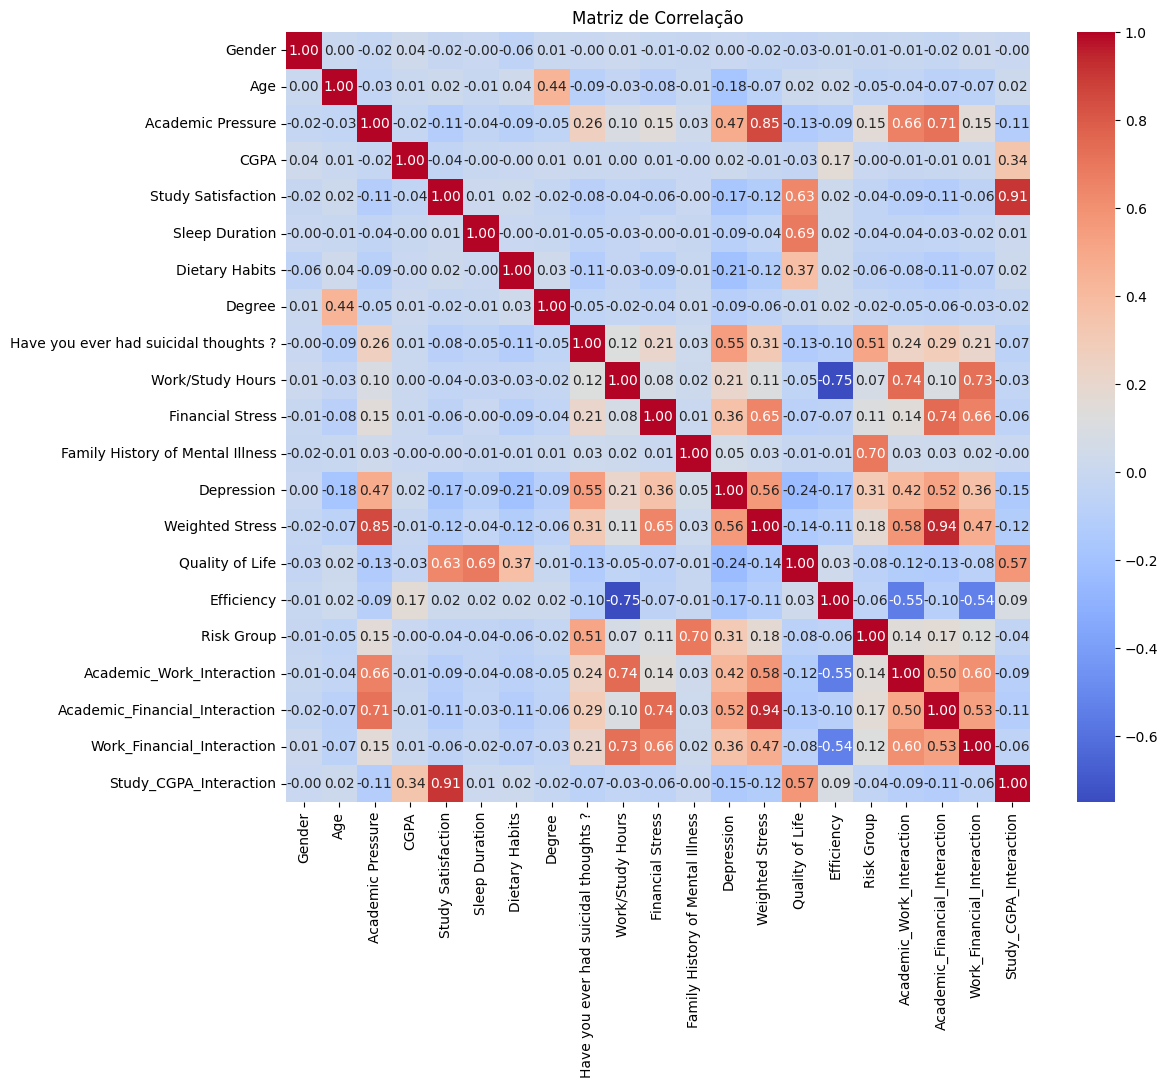

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação')
plt.show()

In [5]:

features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?','Weighted Stress','Academic_Work_Interaction',
    'Financial Stress','Risk Group','Academic_Financial_Interaction','Work_Financial_Interaction', 'Depression'
]

df_feature = df[features]

df_feature.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Weighted Stress,Academic_Work_Interaction,Financial Stress,Risk Group,Academic_Financial_Interaction,Work_Financial_Interaction,Depression
0,5.0,1,3.4,15.0,1.0,0,5.0,3.0,1
1,2.0,0,2.0,6.0,2.0,0,4.0,6.0,0
2,3.0,0,2.2,27.0,1.0,0,3.0,9.0,0
3,3.0,1,3.8,12.0,5.0,1,15.0,20.0,1
4,4.0,1,2.8,4.0,1.0,0,4.0,1.0,0


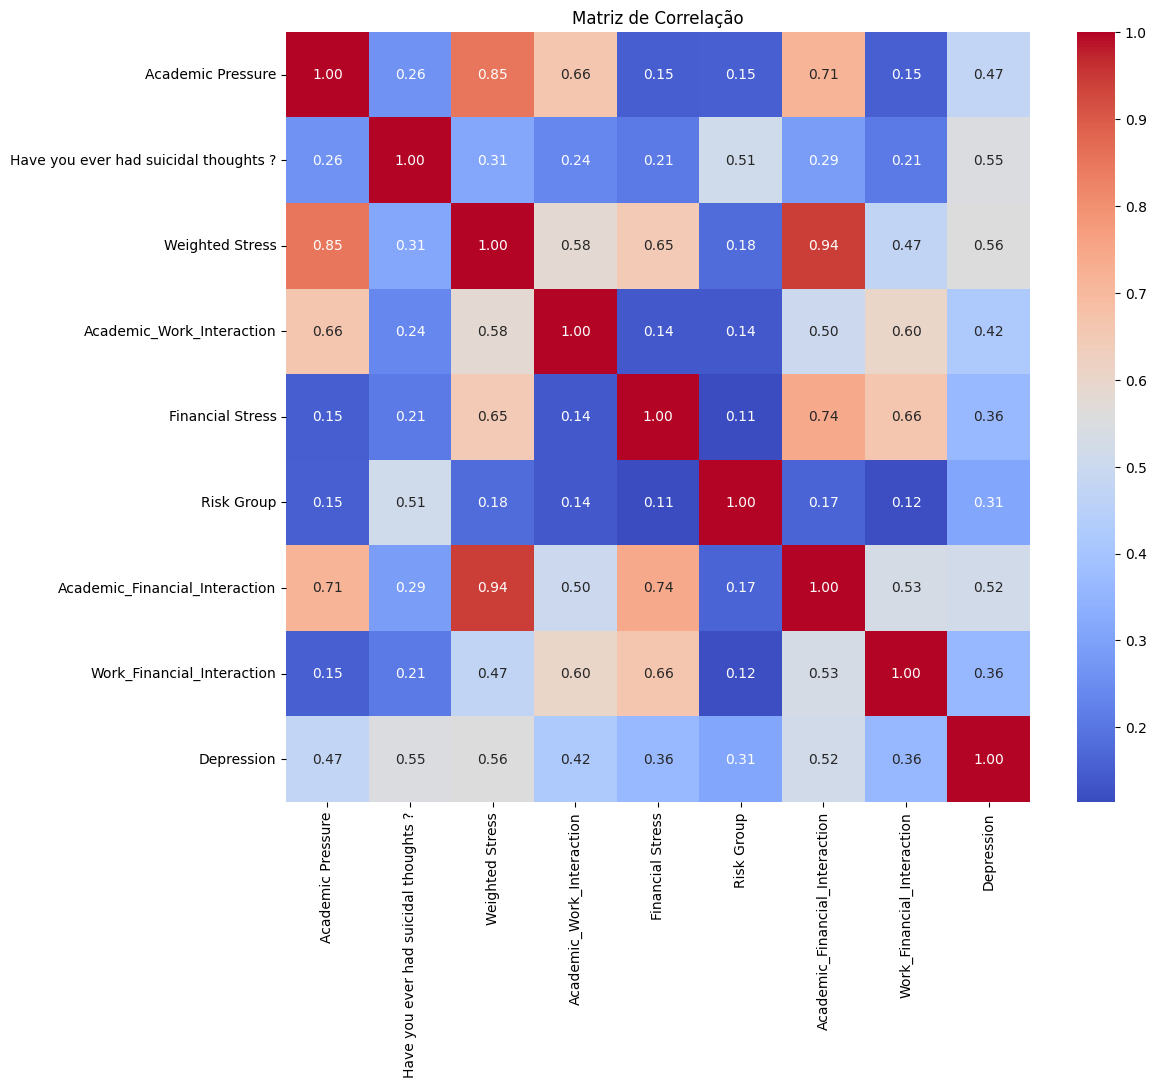

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_feature.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação')
plt.show()

In [7]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27833 entries, 0 to 27832
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Academic Pressure                      27833 non-null  float64
 1   Have you ever had suicidal thoughts ?  27833 non-null  int64  
 2   Weighted Stress                        27833 non-null  float64
 3   Academic_Work_Interaction              27833 non-null  float64
 4   Financial Stress                       27833 non-null  float64
 5   Risk Group                             27833 non-null  int64  
 6   Academic_Financial_Interaction         27833 non-null  float64
 7   Work_Financial_Interaction             27833 non-null  float64
 8   Depression                             27833 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 1.9 MB


In [8]:
print("\nDistribuição da variável target (Depression):")
print(df['Depression'].value_counts())


Distribuição da variável target (Depression):
Depression
1    16297
0    11536
Name: count, dtype: int64


In [9]:
print("\nPercentual por classe:")
print(df['Depression'].value_counts(normalize=True) * 100)


Percentual por classe:
Depression
1    58.552797
0    41.447203
Name: proportion, dtype: float64


In [10]:
print("\nValores únicos por feature:")
for feature in features:
    print(f"{feature}: {df[feature].nunique()} valores únicos\n")


Valores únicos por feature:
Academic Pressure: 6 valores únicos

Have you ever had suicidal thoughts ?: 2 valores únicos

Weighted Stress: 21 valores únicos

Academic_Work_Interaction: 36 valores únicos

Financial Stress: 5 valores únicos

Risk Group: 2 valores únicos

Academic_Financial_Interaction: 15 valores únicos

Work_Financial_Interaction: 36 valores únicos

Depression: 2 valores únicos



In [11]:
# Preparando os dados para modelagem
# Separando features e target

BATCH_SIZE = 128
RANDOM_STATE = 42

X = df[features[:-1]]  # Todas as features exceto 'Depression'
y = df['Depression']   # Target

print("Features (X):")
print(X.columns.tolist())
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Features (X):
['Academic Pressure', 'Have you ever had suicidal thoughts ?', 'Weighted Stress', 'Academic_Work_Interaction', 'Financial Stress', 'Risk Group', 'Academic_Financial_Interaction', 'Work_Financial_Interaction']
Shape de X: (27833, 8)
Shape de y: (27833,)


In [12]:
# Divisão treino/teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nDivisão dos dados:")
print(f"Treino: X={X_train.shape}, y={y_train.shape}")
print(f"Teste: X={X_test.shape}, y={y_test.shape}")


Divisão dos dados:
Treino: X=(22266, 8), y=(22266,)
Teste: X=(5567, 8), y=(5567,)


In [13]:
# Normalização dos dados (importante para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDados normalizados:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


Dados normalizados:
X_train_scaled shape: (22266, 8)
X_test_scaled shape: (5567, 8)


In [14]:
# Calculando parâmetros ideais para a rede neural

# Parâmetros base
n_features = X_train_scaled.shape[1]  # 8 features
n_samples = X_train_scaled.shape[0]   # 22266 amostras de treino
n_output = 1  # Classificação binária

print(f"Número de features de entrada: {n_features}")
print(f"Número de amostras de treino: {n_samples}")
print(f"Número de neurônios de saída: {n_output}")

Número de features de entrada: 8
Número de amostras de treino: 22266
Número de neurônios de saída: 1


In [15]:
# 1. Regra de Ouro para neurônios na primeira camada oculta
neurons_layer1 = int((n_features + n_output) / 2)
print(f"\n1. Regra de Ouro - Neurônios na 1ª camada: {neurons_layer1}")


1. Regra de Ouro - Neurônios na 1ª camada: 4


In [16]:
# 2. Para a segunda camada (opcional), usar metade da primeira
neurons_layer2 = max(2, int(neurons_layer1 / 2))
print(f"2. Neurônios na 2ª camada (opcional): {neurons_layer2}")

2. Neurônios na 2ª camada (opcional): 2


In [17]:
# 3. Calculando número total de parâmetros para verificar Teorema VC
# Modelo com 1 camada oculta: (8 * neurons_layer1) + neurons_layer1 + (neurons_layer1 * 1) + 1
params_1_layer = (n_features * neurons_layer1) + neurons_layer1 + (neurons_layer1 * n_output) + n_output

# Modelo com 2 camadas ocultas
params_2_layers = ((n_features * neurons_layer1) + neurons_layer1 + 
                   (neurons_layer1 * neurons_layer2) + neurons_layer2 + 
                   (neurons_layer2 * n_output) + n_output)


In [18]:
print(f"\n3. Teorema da Dimensão VC:")
print(f"   Parâmetros com 1 camada oculta: {params_1_layer}")
print(f"   Parâmetros com 2 camadas ocultas: {params_2_layers}")
print(f"   Amostras de treino disponíveis: {n_samples}")
print(f"   Razão parâmetros/amostras (1 camada): {params_1_layer/n_samples:.4f}")
print(f"   Razão parâmetros/amostras (2 camadas): {params_2_layers/n_samples:.4f}")


3. Teorema da Dimensão VC:
   Parâmetros com 1 camada oculta: 41
   Parâmetros com 2 camadas ocultas: 49
   Amostras de treino disponíveis: 22266
   Razão parâmetros/amostras (1 camada): 0.0018
   Razão parâmetros/amostras (2 camadas): 0.0022


In [19]:

# 4. Batch size baseado no tamanho do dataset
# Regra geral: entre 32-512, com preferência por potências de 2
batch_sizes = [32, 64, 128, 256, 512]
optimal_batch = 128  # Boa escolha para ~22k amostras

print(f"\n4. Batch Size recomendado: {optimal_batch}")
print(f"   Número de batches por época: {n_samples // optimal_batch}")


4. Batch Size recomendado: 128
   Número de batches por época: 173


In [20]:
# 5. Random state para reprodutibilidade
random_state = 42
print(f"\n5. Random State: {random_state}")


5. Random State: 42


In [21]:
# Definindo a função para criar o modelo
def create_neural_network(input_dim, neurons_layer1, neurons_layer2=None, random_state=42):
    """
    Cria uma rede neural para classificação binária
    
    Args:
        input_dim: Número de features de entrada
        neurons_layer1: Neurônios na primeira camada oculta
        neurons_layer2: Neurônios na segunda camada oculta (opcional)
        random_state: Semente para reprodutibilidade
    """
    # Configurando seed para reprodutibilidade
    tf.random.set_seed(random_state)
    np.random.seed(random_state)
    
    model = keras.Sequential()
    
    # Primeira camada oculta
    model.add(layers.Dense(
        neurons_layer1, 
        activation='relu', 
        input_shape=(input_dim,),
        kernel_initializer='he_normal',
        name='hidden_layer_1'
    ))
    
    # Dropout para regularização
    model.add(layers.Dropout(0.3, name='dropout_1'))
    
    # Segunda camada oculta (opcional)
    if neurons_layer2:
        model.add(layers.Dense(
            neurons_layer2, 
            activation='relu',
            kernel_initializer='he_normal',
            name='hidden_layer_2'
        ))
        model.add(layers.Dropout(0.2, name='dropout_2'))
    
    # Camada de saída para classificação binária
    model.add(layers.Dense(
        1, 
        activation='sigmoid',
        name='output_layer'
    ))
    
    return model

# Criando os modelos
print("=== MODELO 1: UMA CAMADA OCULTA ===")
model_1_layer = create_neural_network(
    input_dim=n_features,
    neurons_layer1=neurons_layer1,
    random_state=random_state
)

print(model_1_layer.summary())

print("\n=== MODELO 2: DUAS CAMADAS OCULTAS ===")
model_2_layers = create_neural_network(
    input_dim=n_features,
    neurons_layer1=neurons_layer1,
    neurons_layer2=neurons_layer2,
    random_state=random_state
)

print(model_2_layers.summary())

=== MODELO 1: UMA CAMADA OCULTA ===


c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None

=== MODELO 2: DUAS CAMADAS OCULTAS ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
# Compilando os modelos
def compile_model(model):
    """Compila o modelo com configurações otimizadas para classificação binária"""
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    return model

# Compilando ambos os modelos
model_1_layer = compile_model(model_1_layer)
model_2_layers = compile_model(model_2_layers)

print("Modelos compilados com sucesso!")
print("Otimizador: Adam (lr=0.001)")
print("Função de perda: binary_crossentropy")
print("Métricas: accuracy, precision, recall")

Modelos compilados com sucesso!
Otimizador: Adam (lr=0.001)
Função de perda: binary_crossentropy
Métricas: accuracy, precision, recall


In [23]:
# Definindo callbacks para melhor treinamento
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Parâmetros de treinamento
epochs = 100
batch_size = optimal_batch  #
validation_split = 0.2

print(f"Parâmetros de treinamento:")
print(f"- Épocas: {epochs}")
print(f"- Batch size: {batch_size}")
print(f"- Validation split: {validation_split}")
print(f"- Early stopping: Sim (patience=10)")
print(f"- Reduce LR: Sim (patience=5)")

Parâmetros de treinamento:
- Épocas: 100
- Batch size: 128
- Validation split: 0.2
- Early stopping: Sim (patience=10)
- Reduce LR: Sim (patience=5)


In [24]:
# Treinando o modelo com 1 camada oculta
print("=== TREINANDO MODELO COM 1 CAMADA OCULTA ===")

history_1_layer = model_1_layer.fit(
    X_train_scaled, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

=== TREINANDO MODELO COM 1 CAMADA OCULTA ===
Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4041 - loss: 0.9780 - precision: 0.4863 - recall: 0.3483 - val_accuracy: 0.4288 - val_loss: 0.7497 - val_precision: 0.5295 - val_recall: 0.2803 - learning_rate: 0.0010
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5559 - loss: 0.6867 - precision: 0.6180 - recall: 0.6290 - val_accuracy: 0.7142 - val_loss: 0.5646 - val_precision: 0.7358 - val_recall: 0.8039 - learning_rate: 0.0010
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 0.5626 - precision: 0.6750 - recall: 0.8060 - val_accuracy: 0.7503 - val_loss: 0.4920 - val_precision: 0.7542 - val_recall: 0.8553 - learning_rate: 0.0010
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - loss: 0.5237 - precision: 0.6941 - recall: 0.8555 - val_accuracy: 0.7730 - val_loss: 0.4635 - val_precision: 0.7785 - val_recall: 0.8595 - learning_rate: 0.0010
Epoch 5/100
140

In [25]:
# Treinando o modelo com 2 camadas ocultas
print("=== TREINANDO MODELO COM 2 CAMADAS OCULTAS ===")

history_2_layers = model_2_layers.fit(
    X_train_scaled, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

=== TREINANDO MODELO COM 2 CAMADAS OCULTAS ===
Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5837 - loss: 0.7262 - precision: 0.6365 - recall: 0.6707 - val_accuracy: 0.7593 - val_loss: 0.6041 - val_precision: 0.7456 - val_recall: 0.8983 - learning_rate: 0.0010
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6169 - precision: 0.7487 - recall: 0.6704 - val_accuracy: 0.7881 - val_loss: 0.5364 - val_precision: 0.7886 - val_recall: 0.8751 - learning_rate: 0.0010
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - loss: 0.5806 - precision: 0.7952 - recall: 0.6440 - val_accuracy: 0.8044 - val_loss: 0.5131 - val_precision: 0.8288 - val_recall: 0.8423 - learning_rate: 0.0010
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7034 - loss: 0.5660 - precision: 0.8201 - recall: 0.6310 - val_accuracy: 0.8076 - val_loss: 0.5021 - val_precision: 0.8470 - val_recall: 0.8222 - learning_rate: 0.0010
Epoch 5/100
1

In [26]:
# Avaliando os modelos no conjunto de teste
print("=== AVALIAÇÃO DOS MODELOS ===")

# Modelo 1 camada
print("\n--- MODELO 1 CAMADA ---")
test_loss_1, test_acc_1, test_prec_1, test_rec_1 = model_1_layer.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_1 = (model_1_layer.predict(X_test_scaled, verbose=0) > 0.5).astype(int)

print(f"Accuracy: {test_acc_1:.4f}")
print(f"Precision: {test_prec_1:.4f}")
print(f"Recall: {test_rec_1:.4f}")
print(f"F1-Score: {2 * (test_prec_1 * test_rec_1) / (test_prec_1 + test_rec_1):.4f}")

# Modelo 2 camadas
print("\n--- MODELO 2 CAMADAS ---")
test_loss_2, test_acc_2, test_prec_2, test_rec_2 = model_2_layers.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_2 = (model_2_layers.predict(X_test_scaled, verbose=0) > 0.5).astype(int)

print(f"Accuracy: {test_acc_2:.4f}")
print(f"Precision: {test_prec_2:.4f}")
print(f"Recall: {test_rec_2:.4f}")
print(f"F1-Score: {2 * (test_prec_2 * test_rec_2) / (test_prec_2 + test_rec_2):.4f}")

# Comparação
print("\n=== COMPARAÇÃO DOS MODELOS ===")
print(f"Melhor Accuracy: {'1 Camada' if test_acc_1 > test_acc_2 else '2 Camadas'}")
print(f"Melhor F1-Score: {'1 Camada' if (2 * (test_prec_1 * test_rec_1) / (test_prec_1 + test_rec_1)) > (2 * (test_prec_2 * test_rec_2) / (test_prec_2 + test_rec_2)) else '2 Camadas'}")

=== AVALIAÇÃO DOS MODELOS ===

--- MODELO 1 CAMADA ---
Accuracy: 0.8419
Precision: 0.8473
Recall: 0.8905
F1-Score: 0.8684

--- MODELO 2 CAMADAS ---
Accuracy: 0.7765
Precision: 0.7561
Recall: 0.9129
F1-Score: 0.8271

=== COMPARAÇÃO DOS MODELOS ===
Melhor Accuracy: 1 Camada
Melhor F1-Score: 1 Camada


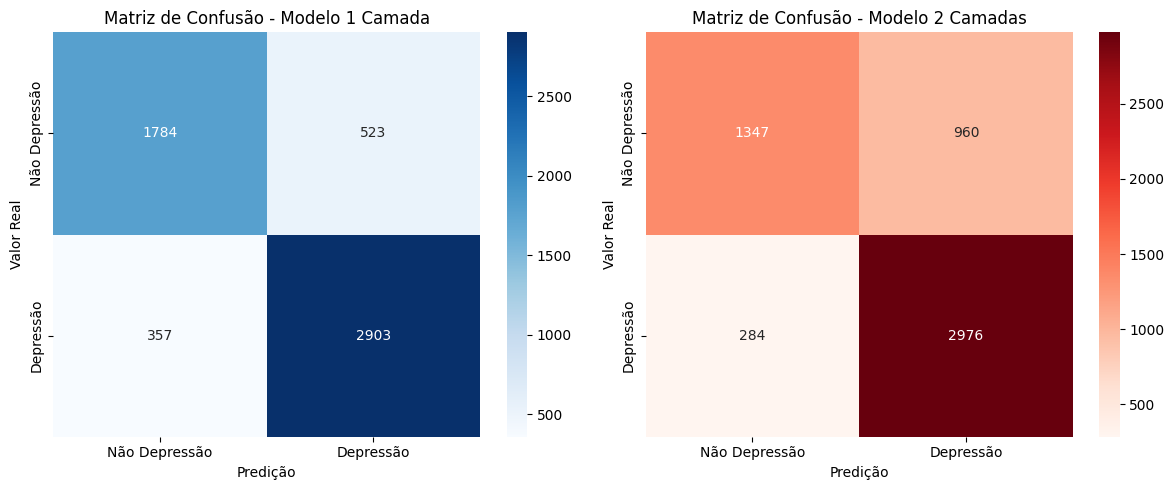

In [27]:
# Visualizando a matriz de confusão para o melhor modelo (1 camada)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Matriz de confusão modelo 1 camada
plt.subplot(1, 2, 1)
cm_1 = confusion_matrix(y_test, y_pred_1)
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Depressão', 'Depressão'], 
            yticklabels=['Não Depressão', 'Depressão'])
plt.title('Matriz de Confusão - Modelo 1 Camada')
plt.ylabel('Valor Real')
plt.xlabel('Predição')

# Matriz de confusão modelo 2 camadas
plt.subplot(1, 2, 2)
cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Não Depressão', 'Depressão'], 
            yticklabels=['Não Depressão', 'Depressão'])
plt.title('Matriz de Confusão - Modelo 2 Camadas')
plt.ylabel('Valor Real')
plt.xlabel('Predição')

plt.tight_layout()
plt.show()

### Feito por Bruno


In [28]:
X = df[features[:-1]]  # Todas as features exceto 'Depression'
y = df['Depression']   # Target

print("Features (X):")
print(X.columns.tolist())
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

# Divisão treino/teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Features (X):
['Academic Pressure', 'Have you ever had suicidal thoughts ?', 'Weighted Stress', 'Academic_Work_Interaction', 'Financial Stress', 'Risk Group', 'Academic_Financial_Interaction', 'Work_Financial_Interaction']
Shape de X: (27833, 8)
Shape de y: (27833,)
